In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Malware


/content/drive/My Drive/Malware


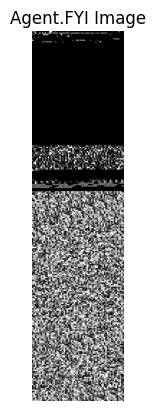

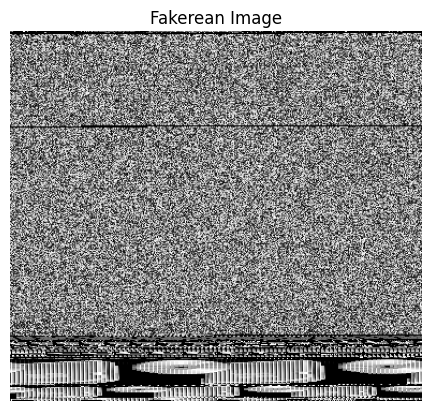

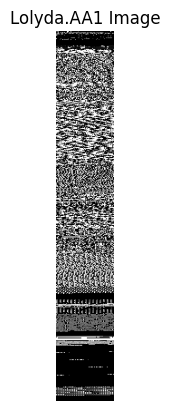

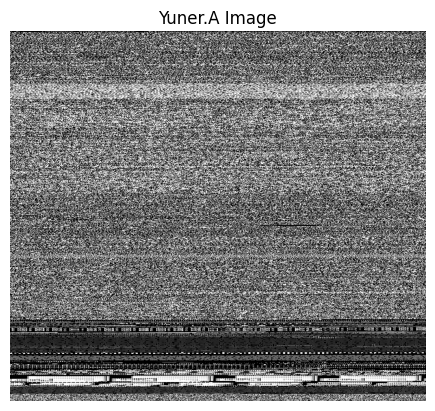

In [3]:
import cv2
import os
import matplotlib.pyplot as plt

# Directorio donde se encuentran las imágenes
directory = '/content/drive/MyDrive/Malware'

# Función para cargar imágenes
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = cv2.imread(path)
        if img is not None:
            images.append(img)
    return images

# Cargar imágenes de cada carpeta
agent_images = load_images_from_folder(os.path.join(directory, 'Agent.FYI'))
fakerean_images = load_images_from_folder(os.path.join(directory, 'Fakerean'))
lolyda_images = load_images_from_folder(os.path.join(directory, 'Lolyda.AA1'))
yuner_images = load_images_from_folder(os.path.join(directory, 'Yuner.A'))

# Función para mostrar una imagen de cada categoría
def show_one_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Mostrar una imagen de cada categoría
show_one_image(agent_images[0], 'Agent.FYI Image')
show_one_image(fakerean_images[0], 'Fakerean Image')
show_one_image(lolyda_images[0], 'Lolyda.AA1 Image')
show_one_image(yuner_images[0], 'Yuner.A Image')


Al cargar las imágenes de cada categoría y mostrar una imagen de cada una, podemos observar que las imágenes tienen diferentes formas. Esto es común cuando se trabaja con conjuntos de datos de imágenes, ya que las imágenes pueden tener diferentes dimensiones, resoluciones y proporciones.

Nuestro objetivo es procesar estas imágenes para que todas tengan la misma forma. Esto es importante para garantizar que nuestro modelo pueda trabajar de manera consistente y no se vea afectado por diferencias en las dimensiones de las imágenes.


Después de redimensionar las imágenes, también podemos combinar todas las imágenes en una sola variable para simplificar el procesamiento y la manipulación de los datos. Esto nos permitirá trabajar de manera más eficiente con el conjunto de datos completo.

Ahora, procederemos a redimensionar todas las imágenes para que tengan la misma forma y luego las combinaremos en una sola variable para su procesamiento posterior.

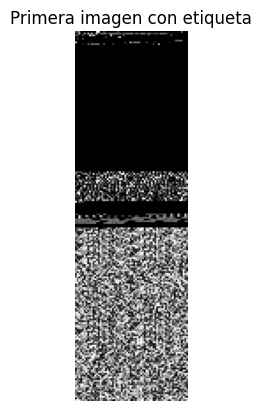

Etiqueta: 0


In [4]:
# Cargar etiquetas de cada carpeta
agent_labels = [0] * len(agent_images)  # Etiqueta 0 para la carpeta Agent.FYI
fakerean_labels = [1] * len(fakerean_images)  # Etiqueta 1 para la carpeta Fakerean
lolyda_labels = [2] * len(lolyda_images)  # Etiqueta 2 para la carpeta Lolyda.AA1
yuner_labels = [3] * len(yuner_images)  # Etiqueta 3 para la carpeta Yuner.A

# Concatenar todas las imágenes y etiquetas
images = agent_images + fakerean_images + lolyda_images + yuner_images
labels = agent_labels + fakerean_labels + lolyda_labels + yuner_labels

def show_image_with_label(image, label, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()
    print("Etiqueta:", label)

# Mostrar la primera imagen de la variable images con su etiqueta
show_image_with_label(images[25], labels[25], "Primera imagen con etiqueta")

Comprobanmos que se han guardado de manera correcta las imagenes en la variable images. Una vez tenemos todas las imagenes en una misma variable tendremos que separarlas en dos conjuntos, el de entrenamiento y el de evaluación, siendo este ultimo un 20% del conjunto total de imagenes.

In [5]:
from sklearn.model_selection import train_test_split

# Dividir las variables en conjuntos de entrenamiento y evaluación
train_images, eval_images, train_labels, eval_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos
print("Forma del conjunto de entrenamiento de imágenes:", len(train_images))
print("Forma del conjunto de evaluación de imágenes:", len(eval_images))



Forma del conjunto de entrenamiento de imágenes: 372
Forma del conjunto de evaluación de imágenes: 93


Una vez separados los dos conjuntos, estando estos formados por casi 400 imagenes en el set de entrenamiento y casi 100 en el set de evaluación, pasaremos a la parte de reducción de dimensionalidad, pero para ello tendremos que saber cuales eran los formatos exactos de cada una de las imagenes.

In [6]:
print("Forma de agent_images:", agent_images[0].shape)
print("Forma de fakerean_images:", fakerean_images[0].shape)
print("Forma de lolyda_images:", lolyda_images[0].shape)
print("Forma de yuner_images:", yuner_images[0].shape)

Forma de agent_images: (259, 64, 3)
Forma de fakerean_images: (345, 384, 3)
Forma de lolyda_images: (408, 64, 3)
Forma de yuner_images: (683, 768, 3)


Una vez ya hemos guardado todas las imagenes en una misma variable comenzaremos el proceso de reducción de la dimensionalidad, ya que comprobamos que cada una de las imagenes tiene una forma totalmente distinta, de esta forma  todas presentaran un mismo formato de 256 de alto y 64 de ancho.

In [8]:
import random
# Función para redimensionar imágenes
def resize_images(images, target_shape):
    resized_images = []
    for img in images:
        # Redimensionar la imagen
        resized_img = cv2.resize(img, target_shape, interpolation=cv2.INTER_AREA)
        resized_images.append(resized_img)
    return resized_images
 # Definir la forma objetivo para las imágenes
target_shape = (64, 256)  # Por ejemplo, redimensionar todas las imágenes a 256x64 píxeles

# Redimensionar las imágenes de entrenamiento
train_images_resized = resize_images(train_images, target_shape)
eval_images_resized = resize_images(eval_images, target_shape)


#guardaremos las 10 imagenes que usaremos luego
# Número de imágenes que deseas seleccionar aleatoriamente
num_images = 10

# Índices aleatorios para seleccionar las imágenes
random_indices = random.sample(range(len(train_images_resized)), num_images)

# Seleccionar las imágenes y etiquetas correspondientes
comp_images = [train_images_resized[i] for i in random_indices]
comp_labels = [train_labels[i] for i in random_indices]

# Eliminar las imágenes seleccionadas de train_images_resized
train_images_resized = [img for idx, img in enumerate(train_images_resized) if idx not in random_indices]
train_labels = [img for idx, img in enumerate(train_labels) if idx not in random_indices]


print("Forma de imagenes:", train_images_resized[0].shape)


Forma de imagenes: (256, 64, 3)


El proceso de redimensionamiento de imágenes es esencial para garantizar que todas las imágenes en nuestro conjunto de datos tengan la misma forma.  Para lograr esto, empleamos una función que recorre todas las imágenes y las redimensiona a una forma específica, 256x64. Esto garantiza que todas las imágenes se ajusten a la misma estructura, lo que facilita el procesamiento por parte del modelo.

Luego, realizamos una selección aleatoria de un subconjunto de imágenes de nuestro conjunto de entrenamiento. Conjunto que posteriormente utilizaremos para validar que nuestro modelo funcione al 100%, formado por 10 imagenes aleatorias de nuestro conjunto de entrenamiento.

Después de seleccionar las imágenes aleatorias, procedemos a eliminarlas del conjunto de entrenamiento original. Esto se hace para evitar que estas imágenes se utilicen en el proceso de entrenamiento del modelo. Al eliminarlas, nos aseguramos de que las imágenes seleccionadas no interfieran con el proceso de entrenamiento del modelo y no se confundan con datos de evaluación o validación. Esto es importante para garantizar la integridad y la validez del proceso de entrenamiento.

Finalmente, verificamos la forma de las imágenes restantes en nuestro conjunto de entrenamiento redimensionado. Esto es simplemente una comprobación para confirmar que todas las imágenes tienen la misma forma después del proceso de redimensionamiento y la selección aleatoria.

##**Configuración 1 kernnel linal**

In [9]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
# Aplanar las imágenes de entrenamiento y evaluación
train_images_flat = np.array([img.flatten() for img in train_images_resized])
eval_images_flat = np.array([img.flatten() for img in eval_images_resized])

# Crear el clasificador SVM
svm_classifier = SVC(kernel='linear')

# Entrenar el clasificador SVM
svm_classifier.fit(train_images_flat, train_labels)

# Predecir las etiquetas de las imágenes de evaluación
predicted_labels = svm_classifier.predict(eval_images_flat)

# Calcular la precisión del clasificador
accuracy = accuracy_score(eval_labels, predicted_labels)
print("Precisión del clasificador SVM:", accuracy)


Precisión del clasificador SVM: 1.0


En este fragmento de código, estamos utilizando el clasificador de vectores de soporte (SVC) de la biblioteca scikit-learn para construir un modelo de clasificación. Este modelo se utiliza para clasificar las imágenes en diferentes categorías basadas en sus características. El clasificador SVC es una implementación del algoritmo de máquinas de vectores de soporte (SVM), que es una técnica de aprendizaje supervisado utilizada para la clasificación y regresión.

Específicamente, estamos utilizando un kernel lineal al crear el clasificador SVC. Un kernel lineal es una función que utiliza la relación lineal entre las características de entrada y las etiquetas de salida para realizar la clasificación. Este tipo de kernel es adecuado para conjuntos de datos linealmente separables, donde las clases pueden ser divididas por un hiperplano en el espacio de características. Utilizar un kernel lineal puede ser beneficioso cuando se trabaja con conjuntos de datos grandes o cuando se quiere evitar el sobreajuste.

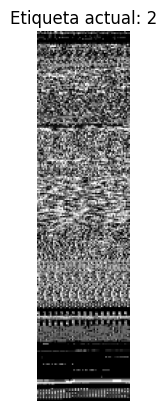

La etiqueta predicha es: 2


In [10]:
import random

# Seleccionar una imagen al azar del conjunto de evaluación
random_index = random.randint(0, len(eval_images_resized) - 1)
random_image = eval_images_resized[random_index]
random_label = eval_labels[random_index]

# Mostrar la imagen y su etiqueta
plt.imshow(random_image)
plt.title("Etiqueta actual: " + str(random_label))
plt.axis('off')
plt.show()

# Predecir la etiqueta usando el clasificador SVM
predicted_label = svm_classifier.predict([random_image.flatten()])[0]

# Imprimir la etiqueta predicha
print("La etiqueta predicha es:", predicted_label)


Comprobamos que nuestro modelo verdarderamente predice todas y cada una de las imagenes de nuestro conjunto de evaluación de manera correcta

##**Configuración 2 sin kernnel**

In [11]:
# Crear el clasificador SVM con kernel polinomial
svm_rbf_classifier = SVC()

# Entrenar el clasificador SVM
svm_rbf_classifier.fit(train_images_flat, train_labels)

# Predecir las etiquetas de las imágenes de evaluación
predicted_labels_rbf = svm_rbf_classifier.predict(eval_images_flat)

# Calcular la precisión del clasificador
accuracy_rbf = accuracy_score(eval_labels, predicted_labels_rbf)
print("Precisión del clasificador SVM con kernel radial (RBF):", accuracy_rbf)


Precisión del clasificador SVM con kernel radial (RBF): 1.0


En este fragmento de código, estamos creando un clasificador SVM utilizando la clase SVC de scikit-learn, pero en este caso no especificamos un kernel específico. En el fragmento anterior, se utilizó el kernel lineal (kernel='linear'). Aquí, al no especificar un kernel, el clasificador SVC utilizará el kernel radial (RBF) de forma predeterminada

La elección del kernel puede tener un impacto significativo en el rendimiento del clasificador SVM y en su capacidad para modelar relaciones complejas entre las características y las etiquetas. El kernel lineal es adecuado para problemas linealmente separables, mientras que el kernel radial (RBF) es más adecuado para problemas no lineales o cuando la relación entre las características y las etiquetas es más compleja.

##**Confugración 3 kernnel polinomial**

In [12]:
# Crear el clasificador SVM con kernel radial (RBF)
svm_poly_classifier = SVC(kernel='poly')

# Entrenar el clasificador SVM
svm_poly_classifier.fit(train_images_flat, train_labels)

# Predecir las etiquetas de las imágenes de evaluación
predicted_labels_poly = svm_poly_classifier.predict(eval_images_flat)

# Calcular la precisión del clasificador
accuracy_poly = accuracy_score(eval_labels, predicted_labels_poly)
print("Precisión del clasificador SVM con kernel polinomial:", accuracy_poly)


Precisión del clasificador SVM con kernel polinomial: 1.0



En este fragmento de código, estamos creando un clasificador SVM utilizando el kernel polinomial. A diferencia de los fragmentos anteriores donde se utilizó el kernel radial (RBF) y el kernel lineal, el kernel polinomial tiene su propia característica distintiva en el proceso de clasificación.

El kernel polinomial es capaz de capturar relaciones no lineales entre las características y las etiquetas de salida. Funciona elevando las características a una potencia específica y luego calculando su producto interno. Esto significa que el kernel polinomial puede modelar relaciones polinomiales entre las características y las etiquetas, lo que lo hace útil para problemas donde se sospecha que existen patrones no lineales pero estructura polinomial.

Al ver que tenemos un 100% de precisión en todos los modelos podemos obtener distintas conclusiones.

Los datos pueden ser fácilmente separables, lo que significa que existe una frontera de decisión clara entre las diferentes clases. Si los datos son perfectamente separables, es posible que un modelo de clasificación pueda lograr una precisión del 100%.

 La precisión del 100% también puede ocurrir en conjuntos de datos muy pequeños, especialmente si el número de muestras es mucho menor que el número de características. En tales casos, el modelo podría simplemente memorizar el conjunto de datos de entrenamiento en lugar de aprender patrones generales que se puedan generalizar a nuevos datos.

 Aún así comprobaremos si funcionan en nuestro modelo lineal con las imagenes que habiamos guardado de validación en nuestra variable comp_images.

In [13]:
comp_flat = np.array([img.flatten() for img in comp_images])

# Predecir las etiquetas de las imágenes de comp_images
predicted_labels_comp = svm_classifier.predict(comp_flat)

# Mostrar las etiquetas predichas y las etiquetas reales de comp_images
for i in range(len(comp_images)):
    print("Imagen", i+1)
    print("Etiqueta predicha:", predicted_labels_comp[i])
    print("Etiqueta real:", comp_labels[i])
    print()


Imagen 1
Etiqueta predicha: 2
Etiqueta real: 2

Imagen 2
Etiqueta predicha: 3
Etiqueta real: 3

Imagen 3
Etiqueta predicha: 2
Etiqueta real: 2

Imagen 4
Etiqueta predicha: 3
Etiqueta real: 3

Imagen 5
Etiqueta predicha: 2
Etiqueta real: 2

Imagen 6
Etiqueta predicha: 2
Etiqueta real: 2

Imagen 7
Etiqueta predicha: 3
Etiqueta real: 3

Imagen 8
Etiqueta predicha: 3
Etiqueta real: 3

Imagen 9
Etiqueta predicha: 2
Etiqueta real: 2

Imagen 10
Etiqueta predicha: 0
Etiqueta real: 0



A pesar de estas consideraciones, los resultados indican que un modelo SVM lineal puede ser adecuado para este conjunto de datos en particular, ya que fue capaz de capturar eficazmente las relaciones entre las características y las etiquetas.

Aunque nuestro modelo parezca que tiene un rendimiento ejemplar, habría que llevar una evaluación mas detallada para poder confirma que sería eficiente en todos las situaciones del mundo real. La evaluación rigurosa y la validación en conjuntos de datos independientes son pasos esenciales para garantizar la fiabilidad y la efectividad de cualquier modelo de aprendizaje automático. Sin embargo conluiremos que para realizar esta practica nuestro modelo podría considerarse un modelo muy eficiente.